In [19]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("solomonameh/spotify-music-dataset")

# print("Path to dataset files:", path)

In [20]:
import pandas as pd

df_low = pd.read_csv("Datos/low_popularity_spotify_data.csv") 
df_high = pd.read_csv("Datos/high_popularity_spotify_data.csv") 

df_low.sample()
df_low_example = df_low[:20]

print(df_low.size)
print(df_high.size)

91205
48894


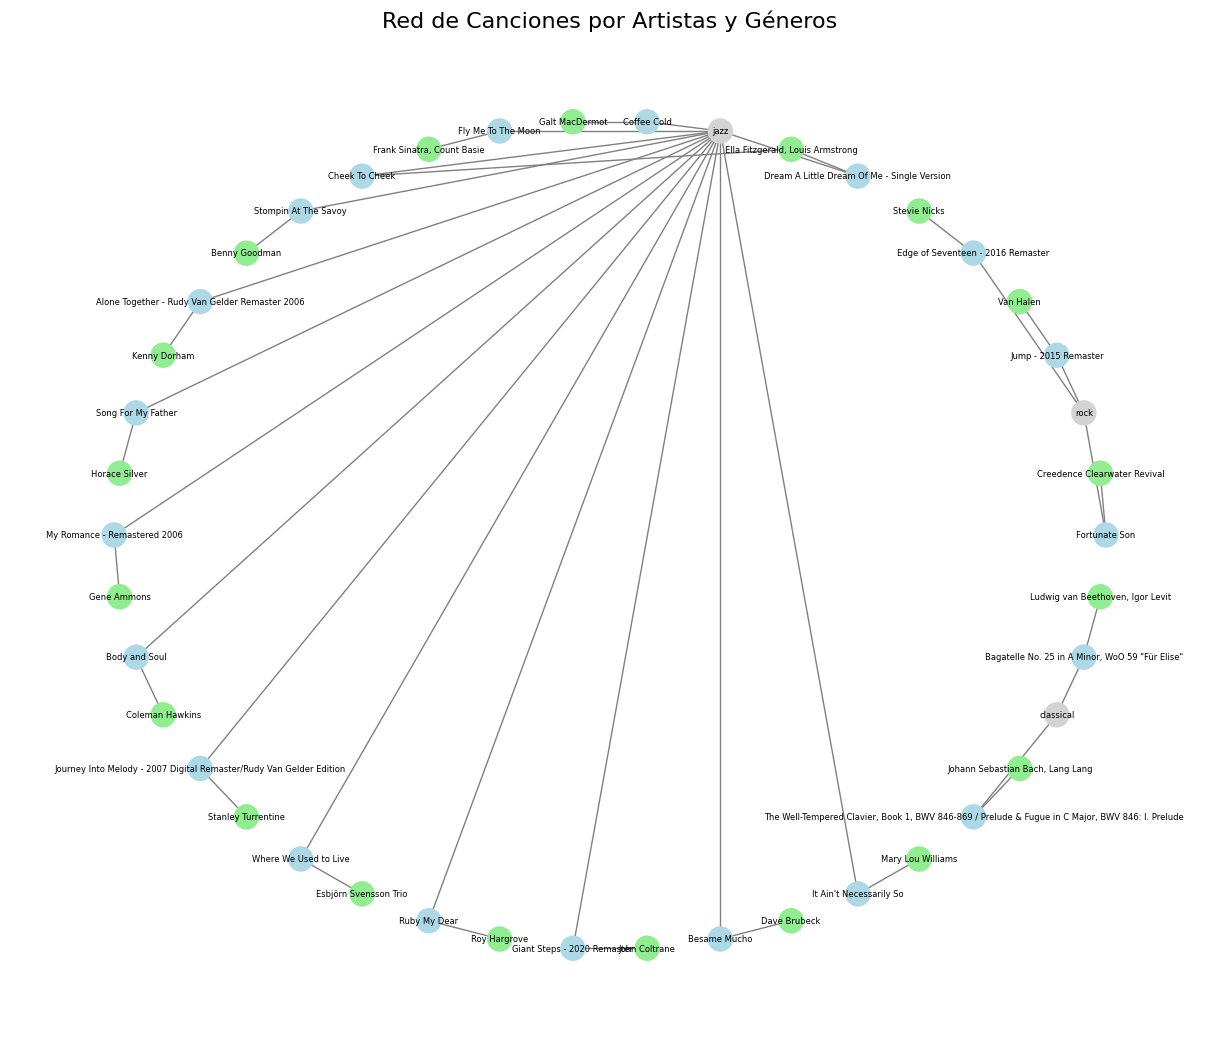

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def GenerateGraph(df_generated):
    # Crear el grafo
    G = nx.Graph()

    for _, row in df_generated.iterrows():
        # Agregar nodos de canciones con atributos
        G.add_node(row['track_name'].replace('$', ''), type="Canción")

        # Agregar nodos de artistas
        G.add_node(row['track_artist'].replace('$', ''), type="Artista")

        # Agregar nodos de géneros
        G.add_node(row['playlist_genre'].replace('$', ''), type="Género")

        G.add_edge(row['track_name'].replace('$', ''), row['track_artist'].replace('$', ''))
        G.add_edge(row['track_name'].replace('$', ''), row['playlist_genre'].replace('$', ''))

    # Dibujar el grafo
    plt.figure(figsize=(12, 10))
    pos = nx.circular_layout(G)  # Algoritmo para distribuir nodos

    # Colorear nodos según su tipo
    node_colors = [
        "lightblue" if G.nodes[node]["type"] == "Canción" else
        "lightgreen" if G.nodes[node]["type"] == "Artista" else
        "lightgray" # Género
        for node in G.nodes
    ]

    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, 
        node_size=300, font_size=6, font_color="black", edge_color="gray"
    )

    plt.title("Red de Canciones por Artistas y Géneros", fontsize=16)
    plt.show()

GenerateGraph(df_low_example)

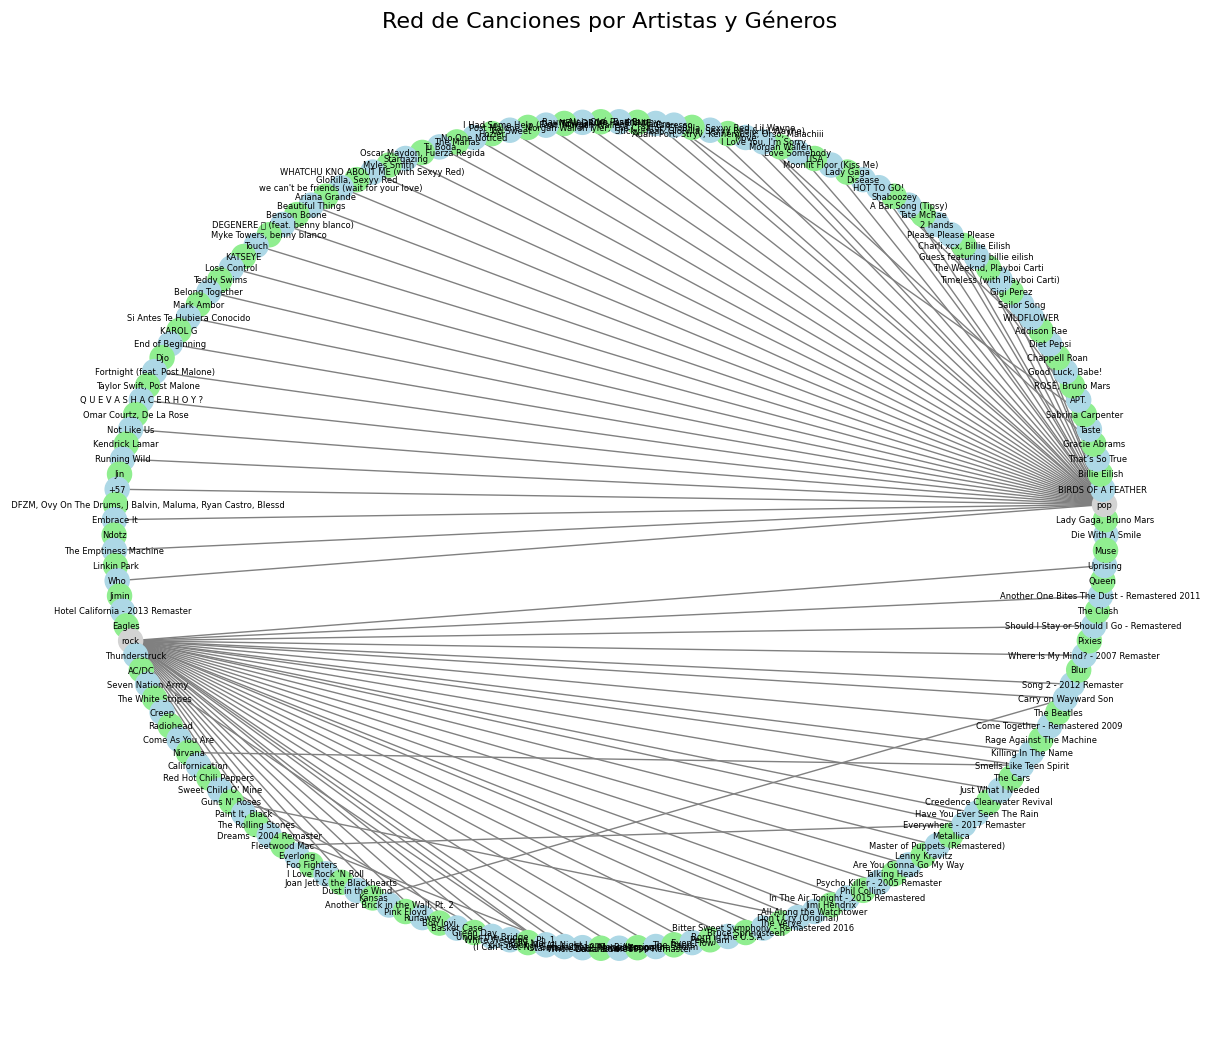

In [23]:
df_high_example = df_high[:90]
GenerateGraph(df_high_example)